# Aplicando o modelo SARIMA 

 - SARIMA_MODEL

In [1]:
#  importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

- importando os dados dos crimes sexuais

In [3]:
crimes_sexuais = pd.read_csv('crimes_sexuais.csv')

In [4]:
crimes_sexuais.head()

,data_da_ocorrencia,crimes_sexuais
0,2014-01-01,43
1,2014-01-02,5
2,2014-01-03,3
3,2014-01-04,3
4,2014-01-05,8


 - convertendo as coluna data para Datetime

In [5]:
crimes_sexuais['data_da_ocorrencia'] = pd.to_datetime(crimes_sexuais['data_da_ocorrencia'])

 - Selecionando apenas os delitos concluídos nos anos 2014 e 2015

In [6]:
crimes_sexuais = crimes_sexuais.query(' data_da_ocorrencia >= "2014-01-01"')

In [7]:
crimes_sexuais['data_da_ocorrencia'].dt.year.value_counts()

2015    365
2014    365
Name: data_da_ocorrencia, dtype: int64

 - Definindo a data como índice

In [8]:
crimes_sexuais = crimes_sexuais.set_index('data_da_ocorrencia')

 - Graficando "crimes_sexuais"

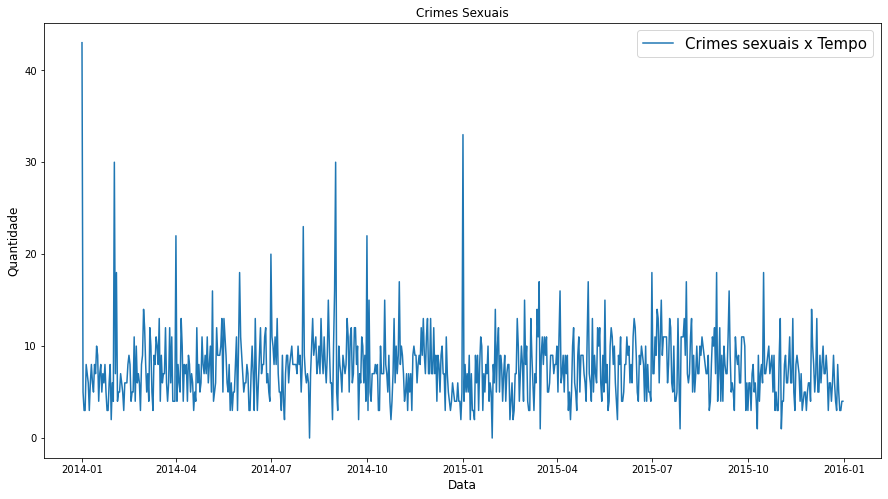

In [9]:
plt.figure(figsize=(15,8))
plt.plot(crimes_sexuais)
plt.title('Crimes Sexuais', fontsize=12)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
legenda= ['Crimes sexuais x Tempo']
plt.legend(legenda, fontsize=15, loc=1)
plt.show()

In [10]:
t_treino = crimes_sexuais[crimes_sexuais.index<'2015-06-01'].index.values
t_teste = crimes_sexuais[crimes_sexuais.index>='2015-06-01'].index.values
X_treino = crimes_sexuais[crimes_sexuais.index<'2015-06-01'].values
X_teste = crimes_sexuais[crimes_sexuais.index>='2015-06-01'].values

- Aplicando o modelo auto regressivo

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [12]:
modelo = SARIMAX(X_treino,order=(2,0,1), seasonal_order=(0,1,1,12))
resultado = modelo.fit()

 - Coeficientes

In [13]:
print('Coefficients: %s' % resultado.params)

Coefficients: [-0.65080915  0.06979526  0.6771572  -0.95229533 17.47208068]


 - Fazendo as predições

In [14]:
X_pred = resultado.predict(start=len(X_treino), end=len(X_treino)+len(X_teste)-1)

 - Calculando erros

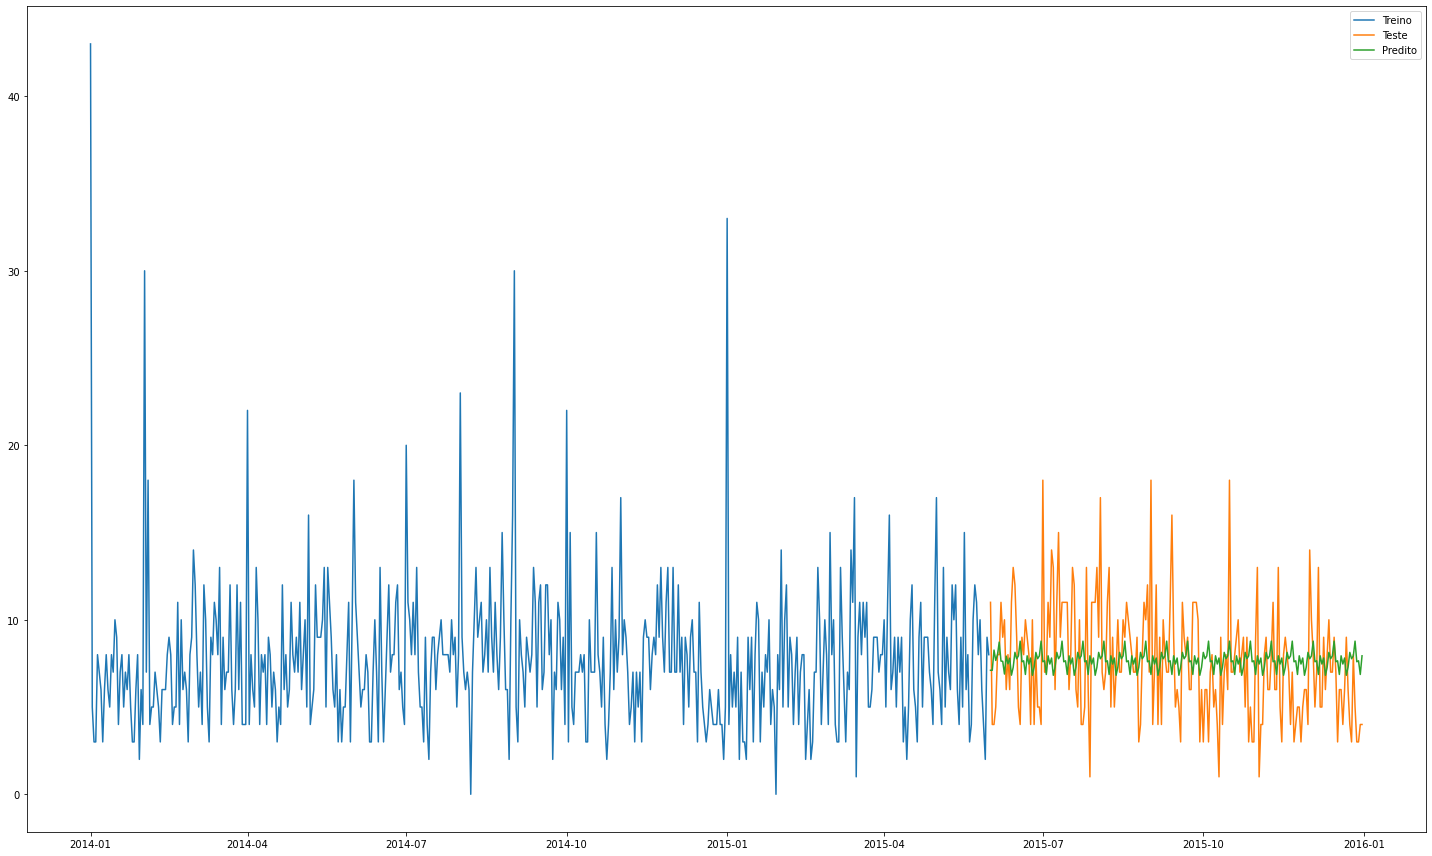

In [15]:
plt.figure(figsize=(20,12))
plt.plot(t_treino,X_treino,label='Treino')
plt.plot(t_teste,X_teste,label='Teste')
plt.plot(t_teste,X_pred,label='Predito')
plt.legend()
plt.tight_layout()

 - calculando erros

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
MSE = mean_squared_error(X_teste,X_pred)

In [18]:
RMSE = np.sqrt(MSE)

In [19]:
print("RMSE = {:0.2f}".format(RMSE))

RMSE = 3.36
